# Regressão - parte 2

Transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [283]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [284]:
# Carregando dataset

tips = sns.load_dataset('tips')

# Obtendo percentual de gorjetas e adicionando ao dataset
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Obtendo a conta líquida e adicionando ao dataset
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

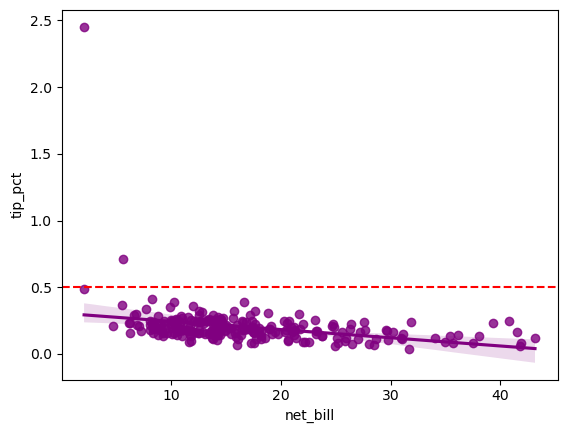

In [286]:
# Visualizando a linha de regressão
sns.regplot(x='net_bill', y='tip_pct', data=tips, color='purple') 

# Como pode-se notar, há outliers. 
# Vamos desconsiderar os valores acima de tip_pct = .5
plt.axhline(y=0.5, color='red', ls='--')

<Axes: xlabel='net_bill', ylabel='tip_pct'>

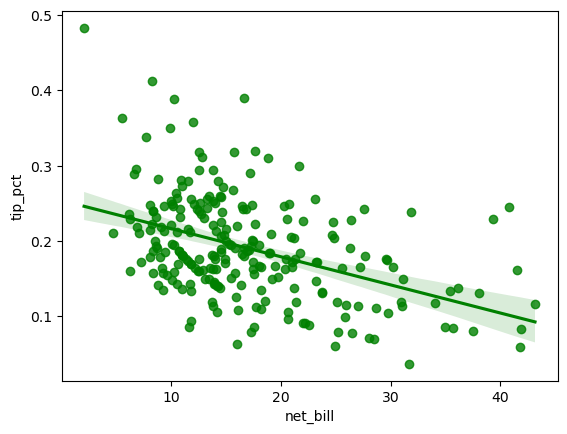

In [287]:
# Tem-se 
tips = tips[tips['tip_pct'] < .5]

# Nova plotagem
sns.regplot(x='net_bill', y='tip_pct', data=tips, color='green')

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.03e-14
Time:                        16:31:43   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023  

Text(0.5, 1.0, 'Padrão do resíduo')

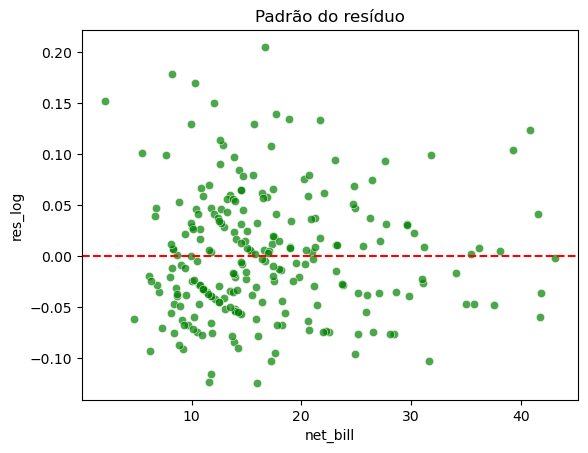

In [288]:

reg_log = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(reg_log.summary())
tips['res_log'] = reg_log.resid

# Plotagem
sns.scatterplot(x='net_bill', y='res_log', data=tips, color='green', alpha=.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Padrão do resíduo')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.09e-12
Time:                        16:31:43   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.29

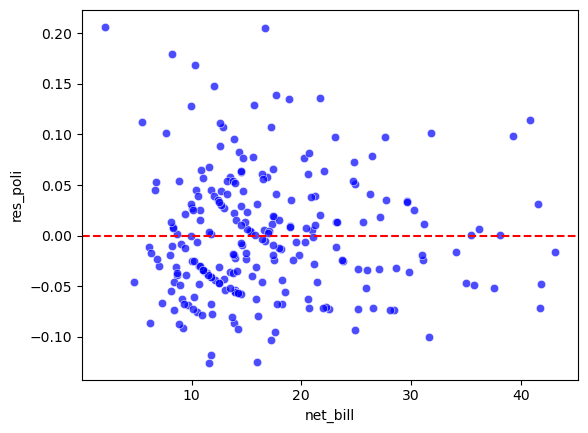

In [290]:
reg_poli = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data=tips).fit()
print(reg_poli.summary())
tips['res_poli'] = reg_poli.resid

sns.scatterplot(x='net_bill', y='res_poli', data=tips, color='blue', alpha=.7)
plt.axhline(y=0, color='red', ls='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           5.70e-15
Time:                        16:31:43   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

Text(0.5, 1.0, 'Padrão do resíduo')

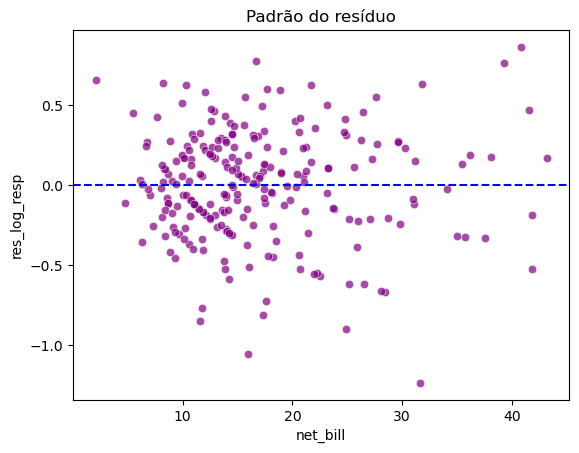

In [292]:
# Ajustando para a variável resposta

reg_log_resp = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg_log_resp.summary())
tips['res_log_resp'] = reg_log_resp.resid

# Plot
sns.scatterplot(x='net_bill', y='res_log_resp', data=tips, color='purple', alpha=.7)
plt.axhline(y=0, color='blue', ls='--')
plt.title('Padrão do resíduo')

#### Para determinar o $R^{2}$, pode-se aplicar a operação inversa do logarítmo, a exponencial.

In [294]:
# Obtendo os valores valores preditos por meio do fittedvalues

tips['predic_log_resp'] = np.exp(reg_log_resp.fittedvalues)
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res_log,res_poli,res_log_resp,predic_log_resp
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-0.124164,-0.125319,-1.056936,0.181872
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.038944,-0.038534,-0.117014,0.214984
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.018932,0.018608,0.129499,0.175607


**O valore de $R^{2}$ pode ser obtido a partir da correlação $r$, em que $r=\sqrt{(R)^{2}}$.**

In [296]:
# Utilizando-se da correlação para determinar o R^2 

r = tips[['predic_log_resp', 'tip_pct']].corr().iloc[0,1]

# O R2 é 
R_quadrado = r**2
R_quadrado

0.20051484016183768

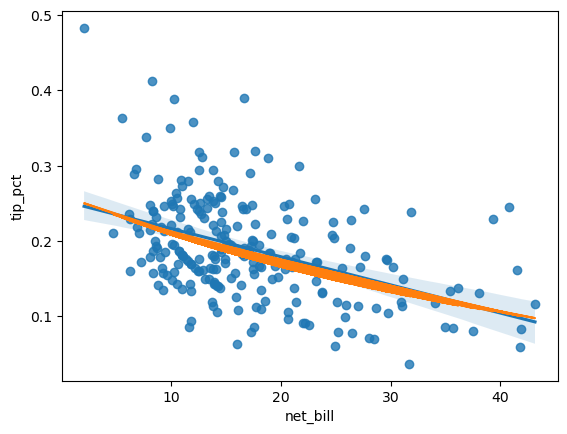

In [297]:
# Comparação das regressões

sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['predic_log_resp'])

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           2.65e-15
Time:                        16:31:44   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131  

Text(0.5, 1.0, 'Padrão do resíduo')

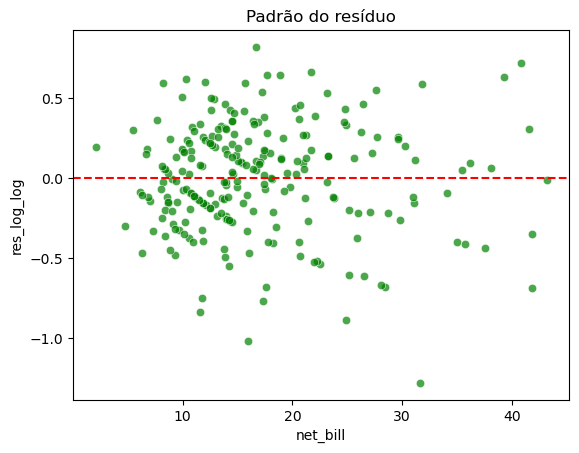

In [299]:
reg_log_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(reg_log_log.summary())
tips['res_log_log'] = reg_log_log.resid

# Plotagem
sns.scatterplot(x='net_bill', y='res_log_log', data=tips, color='green', alpha=.7)
plt.axhline(y=0, color='red', ls='--')
plt.title('Padrão do resíduo')

In [300]:
# Aplicando a mesma lógica do exercício anterior para determinar o R-quadrado

# Aplicando a função inversa (exp())
tips['predic_log_log'] = np.exp(reg_log_log.fittedvalues)
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res_log,res_poli,res_log_resp,predic_log_resp,res_log_log,predic_log_log
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-0.124164,-0.125319,-1.056936,0.181872,-1.016807,0.174718
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.038944,-0.038534,-0.117014,0.214984,-0.155411,0.223400
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.018932,0.018608,0.129499,0.175607,0.171394,0.168402


In [301]:
# correlação

r = tips[['predic_log_log', 'tip_pct']].corr().iloc[0,1]
print('--> Correlação {}'.format(r))

# R-quadrado
R_quadrado = r**2
print('O coeficiente de determinação (R-quadrado) é {}.'.format(round(R_quadrado,3)))

--> Correlação 0.4786892156401967
O coeficiente de determinação (R-quadrado) é 0.229.


###  6. qual modelo resultou no melhor ajuste?

O modelo que melhor descreve a variabilidade dos dados e que teve o melhor ajuste foi desenvolvido no item 5. (log aplicado em ambas as variáveis), como pode ser evidenciado pelo valor de R-quadrado obtido.